In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [3]:
import zipfile
import io
from PIL import Image

def read_jpg_from_zip(zip_filename, jpg_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        with zip_ref.open(jpg_filename) as file:
            # Read the JPG file from the zip as bytes
            jpg_bytes = file.read()
            # Create a BytesIO object from the bytes
            jpg_buffer = io.BytesIO(jpg_bytes)
            # Open the image using PIL (Python Imaging Library)
            jpg_image = Image.open(jpg_buffer)
    return jpg_image


In [4]:
import pandas as pd
data = pd.read_csv(path_data+'im_ch04.csv').drop(columns=['index'])
im = data.values

In [5]:
def format_and_render_plot():
    'Custom function to simplify common formatting operations for exercises.'
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig = plt.gcf()
    ax = fig.axes[0]
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(ax.get_images()[0], cax=cax)
    plt.sca(ax)
    plt.show()

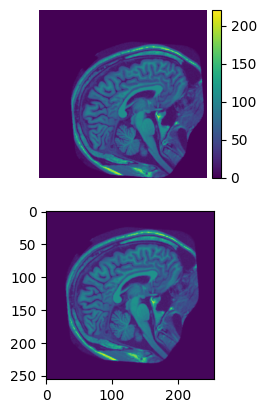

'\nGood job! You can shift your image in as many directions as there are image dimensions.\n'

In [6]:
# exercise 01

"""
Translations

In this chapter, we'll leverage data use data from the Open Access Series of Imaging Studies to compare the brains of different populations: young and old, male and female, healthy and diseased.
(https://www.oasis-brains.org/)
To start, center a single slice of a 3D brain volume (im). First, find the center point in the image array and the center of mass of the brain. Then, translate the image to the center.

This chapter's exercises have all had the following imports:

import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

"""

# Instructions

"""

    Find the center-point of im using ndi.center_of_mass().
    Calculate the distance from the image center (128, 128), along each axis.
    Use ndi.shift() to shift the data.
---
Plot the original and shifted data. First, create an array of subplots with two rows and one column. Then, draw im and xfm on the first and second subplots.
"""

# solution

# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(2,1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Good job! You can shift your image in as many directions as there are image dimensions.
"""

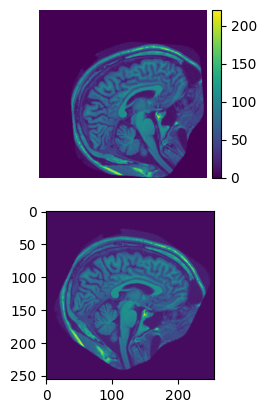

'\nThe order of transformations makes a difference: rotating the image first will alter the object center, changing the amount of shift needed.\n'

In [7]:
# exercise 02

"""
Rotations

In cases where an object is angled or flipped, the image can be rotated. Using ndi.rotate(), the image is rotated from its center by the specified degrees from the right horizontal axis.

For this exercise, shift and rotate the brain image (im) so that it is roughly level and "facing" the right side of the image.
"""

# Instructions

"""

    Shift im towards the center: 20 pixels left and 20 pixels up.
    Use ndi.rotate to turn xfm 30 degrees downward. Set reshape=False to prevent the image shape from changing.
    Plot the original and transformed images.

"""

# solution

# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20,-20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False, axes=(0,1))

# Plot the original and rotated images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
The order of transformations makes a difference: rotating the image first will alter the object center, changing the amount of shift needed.
"""

![affine_transform](/home/nero/Documents/Estudos/DataCamp/Python/courses/biomedical-image-analysis-in-python/Ch4_L3_Transformations.png)

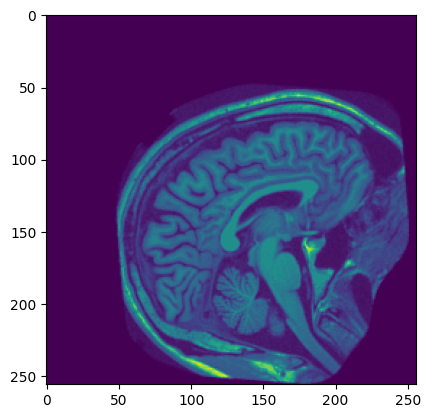

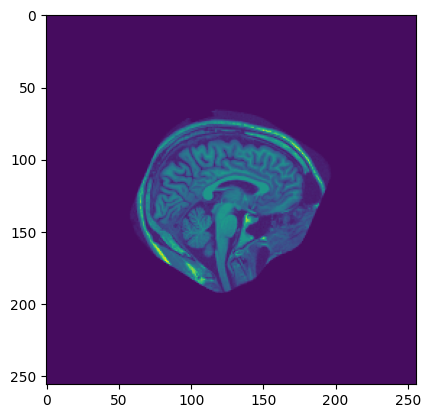

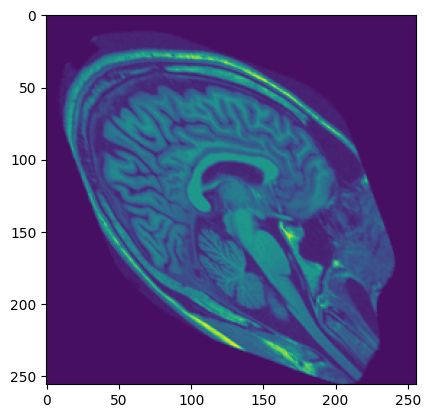

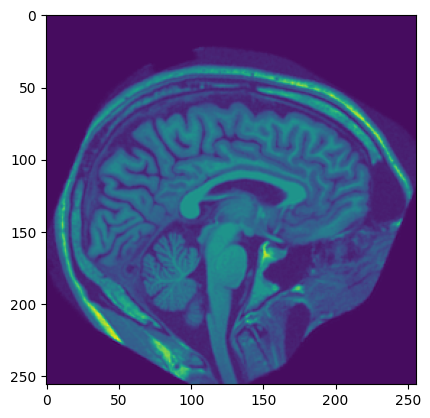

'\n\n'

In [18]:
# exercise 03

"""
Affine transform

An affine transformation matrix provides directions for up to four types of changes: translating, rotating, rescaling and shearing. The elements of the matrix map the coordinates from the input array to the output.

Encoded transformations within a matrix

For this exercise, use ndi.affine_transform() to apply the following registration matrices to im. Which one does the best job of centering, leveling and enlarging the original image?
"""

# Instructions

"""
Possible answers:
    
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    
    [[1.5, -0.8, 60], [0.8, 1.5, -140], [0, 0, 1]]
    
    [[1, -0.3, 60], [-0.3, 1, 60], [0, 0, 1]]
    
    [[0.8, -0.4, 90], [0.4, 0.8, -6.0], [0, 0, 1]] {Answer}
"""

# solution

a1 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
a2 = [[1.5, -0.8, 60], [0.8, 1.5, -140], [0, 0, 1]]
a3 = [[1, -0.3, 60], [-0.3, 1, 60], [0, 0, 1]]
a4 = [[0.8, -0.4, 90], [0.4, 0.8, -6.0], [0, 0, 1]]

transforms = [a1, a2, a3, a4]

for i in transforms:
    aff_im = ndi.affine_transform(im, i)
    plt.imshow(aff_im)
    plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic. To implement matrix transformations in your workflow, you will likely want to use more advanced tools, such as those in scikit-image. The package's website has some nice tutorials. Also, note that 3D images require different size transformation matrices.
"""

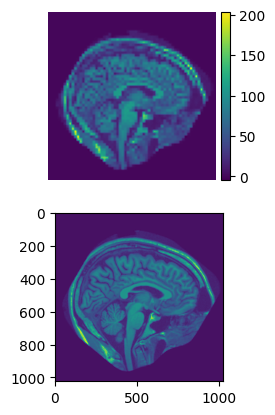

'\nYou can also resample data along a single dimension by passing a tuple: e.g. ndi.zoom(im, zoom=(2,1,1)). This can be useful for making voxels cubic.\n'

In [19]:
# exercise 04

"""
Resampling

Images can be collected in a variety of shapes and sizes. Resampling is a useful tool when these shapes need to be made consistent. Two common applications are:

    Downsampling: combining pixel data to decrease size
    Upsampling: distributing pixel data to increase size

For this exercise, transform and then resample the brain image (im) to see how it affects image shape.
"""

# Instructions

"""

    Shift im 20 pixels left and 20 pixels up, i.e. (-20, -20). Then, rotate it 35 degrees downward. Remember to specify a value for reshape.
    Use ndi.zoom() to downsample the image from (256, 256) to (64, 64).
    Use ndi.zoom() to upsample the image from (256, 256) to (1024, 1024).
    Plot the resampled images.

"""

# solution

# Center and level image
xfm = ndi.shift(im, shift=[-20,-20])
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
You can also resample data along a single dimension by passing a tuple: e.g. ndi.zoom(im, zoom=(2,1,1)). This can be useful for making voxels cubic.
"""

In [21]:
def format_and_render_plots():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Looping through `fig.axes` and turning off axis grid.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Original shape: (256, 256)
Upsampled shape: (1024, 1024)


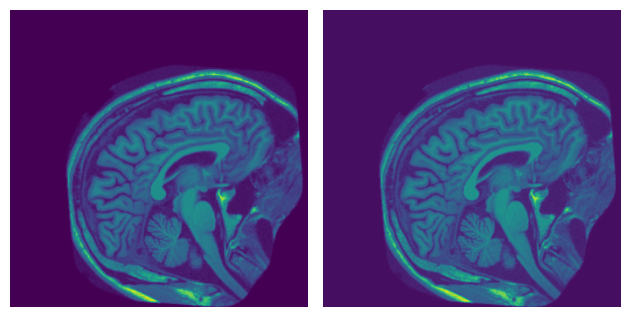

'\nThe key trade-off is that more complex interpolation methods require greater computational resources. This can take a heavy toll when analyzing 3D volumes.\n'

In [24]:
# exercise 05

"""
Interpolation

Interpolation is how new pixel intensities are estimated when an image transformation is applied. It is implemented in SciPy using sets of spline functions.
(https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
Editing the interpolation order when using a function such as ndi.zoom() modifies the resulting estimate: higher orders provide more flexible estimates but take longer to compute.

For this exercise, upsample im and investigate the effect of different interpolation orders on the resulting image.
"""

# Instructions

"""


    Use ndi.zoom() to upsample im from a shape of 128, 128 to 512, 512 twice. First, use an interpolation order of 0, then set order to 5.

    Print the array shapes of im and up0.

    Plot close-ups of the images. Use the index range 128:256 along each axis.

"""

# solution

# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0)
axes[1].imshow(up5)
format_and_render_plots()

#----------------------------------#

# Conclusion

"""
The key trade-off is that more complex interpolation methods require greater computational resources. This can take a heavy toll when analyzing 3D volumes.
"""

In [27]:
im1 = pd.read_csv(path_data+'im1.csv').drop(columns=['index']).values
im2 = pd.read_csv(path_data+'im2.csv').drop(columns=['index']).values

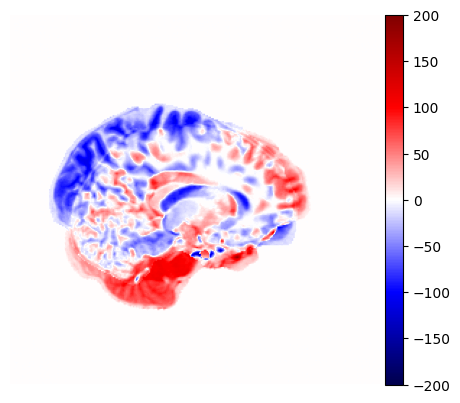

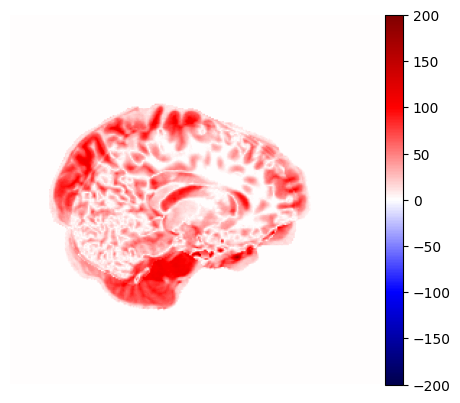

MAE: 9.2608642578125


'\nWell done! The MAE metric allows for variations in weighting throughout the image, which gives areas with high pixel intensities more influence on the cost calculation than others.\n'

In [28]:
# exercise 06

"""
Mean absolute error

Cost functions and objective functions output a single value that summarizes how well two images match.

The mean absolute error (MAE), for example, summarizes intensity differences between two images, with higher values indicating greater divergence.

For this exercise, calculate the mean absolute error between im1 and im2 step-by-step.
"""

# Instructions

"""

    Calculate the difference between im1 and im2.
    Plot err with the seismic colormap. To center the colormap at 0, set vmin=-200 and vmax=200.
---

    Compute the absolute error of the difference. Use np.abs(). Plot the image.
---

    Find the cost value using np.mean().

"""

# solution

# Calculate image difference
err = im1 - im2

# Plot the difference
plt.imshow(err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

#----------------------------------#

# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

#----------------------------------#

# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

#----------------------------------#

# Conclusion

"""
Well done! The MAE metric allows for variations in weighting throughout the image, which gives areas with high pixel intensities more influence on the cost calculation than others.
"""

In [29]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

In [34]:
# exercise 07

"""
Intersection of the union

Another cost function is the intersection of the union (IOU). The IOU is the number of pixels filled in both images (the intersection) out of the number of pixels filled in either image (the union).

For this exercise, determine how best to transform im1 to maximize the IOU cost function with im2. We have defined the following function for you:

def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

Note: When using ndi.rotate(), remember to pass reshape=False, so that array shapes match.
"""

# Instructions

"""
Possible answers:
    
    Shift (-10, -10), rotate -15 deg. {Answer}
    
    Shift (10, 10), rotate -15 deg.
    
    Shift (10, 10), rotate +15 deg.
    
    Shift (-10, -10), rotate +15 deg.

"""

# solution

vals = [(-10,-10,-15), (10,10,-15), (10,10,15), (-10,-10,15)]

for a,b,c in vals:
    im_mod = ndi.shift(im1, shift=(a,b))
    im_mod = ndi.rotate(im_mod, c, reshape=False)
    print(intersection_of_union(im_mod, im2), 'vals:', a,b,c)

#----------------------------------#

# Conclusion

"""
Great job. Remember, the core principle is that a cost function must produce a single summary value across all elements in the image. MAE and IOU are just two of the many possible ways you might compare images.
"""

0.8913400182315405 vals: -10 -10 -15
0.6062325869363326 vals: 10 10 -15
0.520703125 vals: 10 10 15
0.7096597145993414 vals: -10 -10 15


'\nGreat job. Remember, the core principle is that a cost function must produce a single summary value across all elements in the image. MAE and IOU are just two of the many possible ways you might compare images.\n'

In [37]:
df = pd.read_csv(path_data+'oasis_all_volumes.csv', index_col='ID')
df.head()

,age,sex,alzheimers,brain_vol,skull_vol,gray_matter_vol,white_matter_vol,csf_vol
ID,,,,,,,,
OAS1_0001_MR1,74,F,False,807.935,1347.497879,470.698,337.237,57.058
OAS1_0002_MR1,55,F,False,808.760,1151.269287,450.571,358.189,9.478
OAS1_0003_MR1,73,F,True,860.255,1403.415054,492.974,367.281,46.159
OAS1_0004_MR1,28,M,False,1058.202,1593.284910,585.270,472.932,32.609
OAS1_0005_MR1,18,M,False,1263.391,1733.779281,732.734,530.657,14.887


In [39]:
# exercise 08

"""
Identifying potential confounds

Once measures have been extracted, double-check for dependencies within your data. This is especially true if any image parameters (sampling rate, field of view) might differ between subjects, or you pull multiple measures from a single image.

For the final exercises, we have combined demographic and brain volume measures into a pandas DataFrame (df).

First, you will explore the table and available variables. Then, you will check for correlations between the data.
"""

# Instructions

"""
Print three random rows in df using the .sample() method.
---
Print the unique number of individuals with Alzheimer's disease patients.
---
Print the correlation table between each variable.
"""

# solution

# Print random sample of rows
print(df.sample(3))

# Print prevalence of Alzheimer's Disease
print(df.alzheimers.value_counts())

# Print a correlation table
print(df.corr(numeric_only=True))

#----------------------------------#

# Conclusion

"""
Great work! There is a high correlation - nearly 0.7 - between the brain_vol and skull_vol. We should be wary of this (and other highly correlated variables) when interpreting results.
"""

               age sex  alzheimers  brain_vol    skull_vol  gray_matter_vol  \
ID                                                                            
OAS1_0045_MR1   29   M       False   1114.857  1565.150991          616.474   
OAS1_0288_MR1   71   M        True    898.357  1414.908694          515.951   
OAS1_0192_MR1   31   F       False    912.955  1328.760434          506.825   

               white_matter_vol  csf_vol  
ID                                        
OAS1_0045_MR1           498.383   14.727  
OAS1_0288_MR1           382.406   38.132  
OAS1_0192_MR1           406.130   13.513  
alzheimers
False    332
True      93
Name: count, dtype: int64
                       age  alzheimers  brain_vol  skull_vol  gray_matter_vol  \
age               1.000000    0.542463  -0.719211  -0.141576        -0.776362   
alzheimers        0.542463    1.000000  -0.446771   0.014222        -0.460027   
brain_vol        -0.719211   -0.446771   1.000000   0.654829         0.957842   
sk

'\nGreat work! There is a high correlation - nearly 0.7 - between the brain_vol and skull_vol. We should be wary of this (and other highly correlated variables) when interpreting results.\n'

![alzheimers](/home/nero/Documents/Estudos/DataCamp/Python/courses/biomedical-image-analysis-in-python/Ch4_L4_Alzheimers-Typical.png)

t =  -10.27076306169677
p =  3.043550344658516e-22


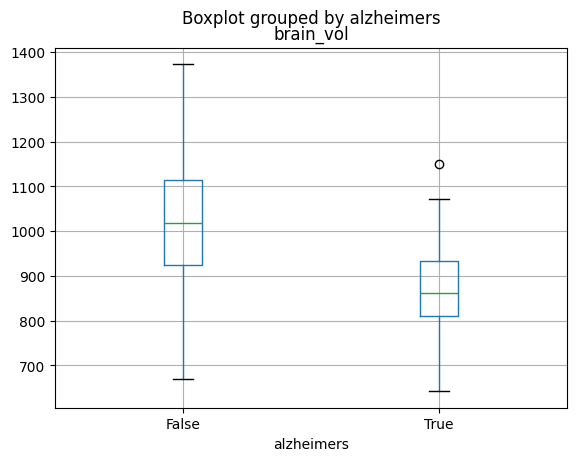

"\nThere is some evidence for decreased brain volume in individuals with Alzheimer's Disease. Since the p-value for this t-test is greater than 0.05, we would not reject the null hypothesis that states the two groups are equal.\n"

In [40]:
# exercise 09

"""
Testing group differences

Let's test the hypothesis that Alzheimer's Disease is characterized by reduced brain volume.

Sample Segmentations of Alzheimer's and Typical Subject

We can perform a two-sample t-test between the brain volumes of elderly adults with and without Alzheimer's Disease. In this case, the two population samples are independent from each other because they are all separate subjects.

For this exercise, use the OASIS dataset (df) and ttest_ind to evaluate the hypothesis.
"""

# Instructions

"""
Import ttest_ind() from scipy.stats.
---
Create a vector of 'brain_vol' values for each of the Alzheimer's Disease and Typical Elderly groups.
---
Use ttest_ind() to test for differences between the two groups' 'gray_vol' metrics. Print the results.
---
Visualize the 'brain_vol' measures using the boxplot() method of df. Group the variables by their disease classification by setting by='alzheimers'.
"""

# solution

# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

#----------------------------------#

# Conclusion
# ??????????????????/
"""
There is some evidence for decreased brain volume in individuals with Alzheimer's Disease. Since the p-value for this t-test is greater than 0.05, we would not reject the null hypothesis that states the two groups are equal.
"""

In [42]:
# exercise 10

"""
Normalizing metrics

We previously saw that there was not a significant difference between the brain volumes of elderly individuals with and without Alzheimer's Disease.

But could a correlated measure, such as "skull volume" be masking the differences?

For this exercise, calculate a new test statistic for the comparison of brain volume between groups, after adjusting for the subject's skull size.

Using results.statistic and results.pvalue as your guide, answer the question: Is there strong evidence that Alzheimer's Disease is marked by smaller brain size, relative to skull size?
"""

# Instructions

"""


    Import ttest_ind from scipy.stats.

    Divide each patient's brain_vol by their skull_vol to create a normalized measure.

    Extract the adjusted brain measures from each group using df.loc.

    Calculate the t-statistic and p-value using ttest_ind. Be sure to pass in brain_alz first, followed by brain_typ.
---
Possible answers:
    
    No, the p-value is greater than 0.05.
    
    Yes, reject the null hypothesis! {Answer}
    
    No, the t-statistic is negative.
    
    No, the p-value is too small.
"""

# solution

# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Divide `df.brain_vol` by `df.skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by Alzheimers group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)
print(results)

#----------------------------------#

# Conclusion

"""
Congratulations! You've worked your way through several levels of biomedical image analysis and are well-prepared for tackling new datasets and problems. For more advanced tools, I recommend checking out scikit-image, which extends the capabilities of scipy for image processing. Good luck!
"""

TtestResult(statistic=-15.311391823926579, pvalue=2.019286086120867e-42, df=423.0)


"\nCongratulations! You've worked your way through several levels of biomedical image analysis and are well-prepared for tackling new datasets and problems. For more advanced tools, I recommend checking out scikit-image, which extends the capabilities of scipy for image processing. Good luck!\n"